# Thomas Nowakowski - Project 8 CNN

In [1]:
# Import Libraries 
import tensorflow
tensorflow.__version__

import warnings  # Ignore Warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Libraries (2)
# Angel - is  there a way to run all the lines above, below or whole notebook, rather than line by line ?

import numpy as np
import pandas as pd
import cv2
import  matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Flatten

# from google.colab.patches import cv2_imshow

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
#  Do i have to authorize this every time i run the book, or once is enough and i do not need to run this again  next time ?
# how will another person run this ? Do they have to change the path to data files or is there a way to share?
from google.colab import drive
drive.mount('/content/drive')



In [4]:

# Load Dataset 

images_color = np.load('images.npy')


labels_orig = pd.read_csv('Labels.csv')

In [5]:
# Print Shape of Data
print('image file shape is:', images_color.shape)
print('label file shape is :', labels_orig.shape)

image file shape is: (4750, 128, 128, 3)
label file shape is : (4750, 1)


# Visualise Images in Dataset

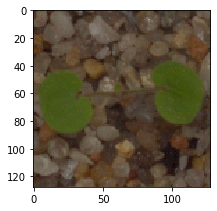

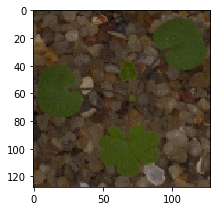

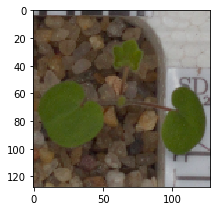

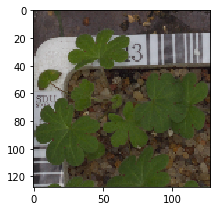

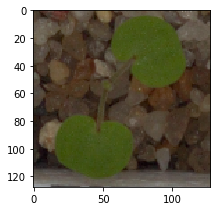

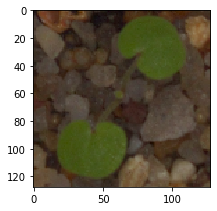

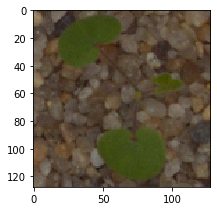

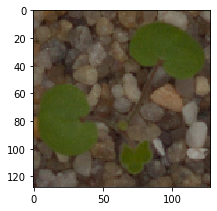

In [6]:
# Visualise Images in Dataset

# To display the image, do as plt.imshow(images[image_id from 0-4749], cmap='gray')
# images will be an array of 4750,128,128,3. when we do images[5], it will fetch the 5 images color values as 128,128,3. # 


for i in range(8):
  plt.figure(figsize=(15,15))
  plt.subplot(4,2,i+1)
  #plt.imshow(images_color[i], cmap='gray')
  plt.imshow(cv2.cvtColor(images_color[i], cv2.COLOR_BGR2RGB))


# Data Pre-Processing


# Gaussian Blurring & Visualisation of the Blurred pictures

In [7]:
# Apply Gaussian Blurr to all images and store them in new array
GBlur_images = np.array(list(map(lambda x: cv2.GaussianBlur(x, (3,3), 0), images_color)))
GBlur_images.shape

(4750, 128, 128, 3)

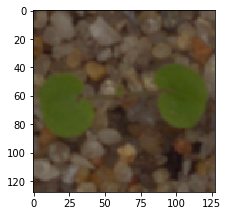

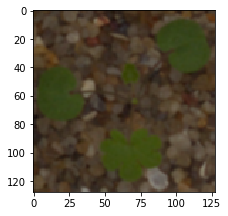

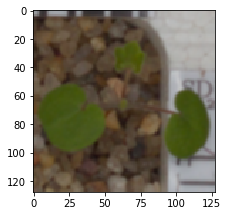

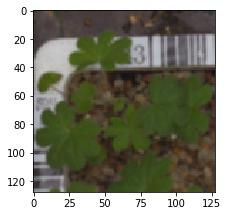

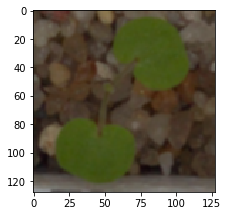

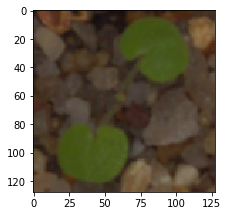

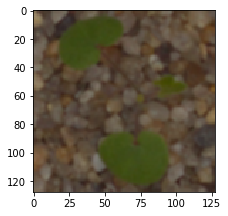

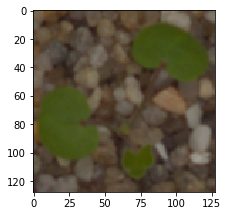

In [8]:
# Visualise the blurred images
for i in range(8):
    plt.figure(figsize=(15,15))
    plt.subplot(2,4,i+1)
    plt.imshow(cv2.cvtColor(GBlur_images[i], cv2.COLOR_BGR2RGB))
    #plt.imshow(cv2.cvtColor(GBlur_images[i], cv2.COLOR_BGR2RGB)) does not work either 
    #cv2_imshow(GBlur_images[i])
 

# Change from RGB to Grayscale to simplyfy the calculation

Learning in CNN will use only 1/3 of the effort since we will use one volume channel (gray) not 3 (RGB). Additonal colors do not add value into classification of images, just multiple calculations of weights in CNN & ANN without any predictive value

In [9]:
images_gray = []
for image in GBlur_images:
    images_gray.append(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
 # self note - after conversion,the data is not in array format hence still has to be shaped into numpy arragy that can be passed to KERAS/CNN
 # hence one more operation is needed below to prepare it for CNN operations


Make Data compatible with KERAS
In order to do so we must turn the newly created gray images above  into a numpy array (as executed below)  that can be fed into KERAS functions 

In [10]:
# Change the new Grayscale data to a numpy array format that is fit for CNN input
# Note that images being turned to gray are Gaussian Blurred images that are preferable for CNN since we have reduced random pixel "noise"
images_gray=np.array(images_gray)
print (' data shape above shows the data is no longer stored in 3 channels, and volume is down to 1  from 3')
print (images_gray.shape)
print ("this data shape is now compatible with KREAS")


 data shape above shows the data is no longer stored in 3 channels, and volume is down to 1  from 3
(4750, 128, 128)
this data shape is now compatible with KREAS


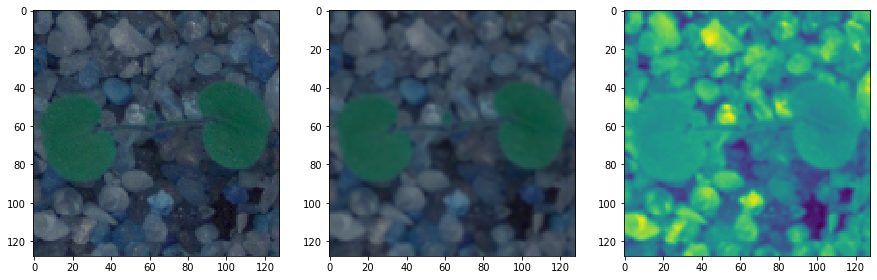

In [11]:
# Show original, blurred and gray image
plt.figure(figsize=(15,15))
plt.subplot(1, 3, 1); plt.imshow(images_color[0])         # Show the original image
plt.subplot(1, 3, 2); plt.imshow(GBlur_images[0])         # Blur image
plt.subplot(1, 3, 3); plt.imshow(images_gray[0])          # Gray image


Standardize /Normalize the data first then, then Convert Labels to one hot vectors

In [12]:
 # Normalize Grayscale Data to prepare for datasplit and CNN input. Change Data value range  - from  0-255 range  into 0-1
 # This will save memory space and calcultion time dealing in smaller numbers
 # We are using the images that have  been blurred and turned to grayscale

X=images_gray.astype('float32')  # change from integer to floa32 since we will have decimal values between 0-1
X=X/255                          # normalize the values from 0-255 to 0-1
XXX=X                            # in case i want to use RGB later, i have a variable that i can reshape  for color convolutions 
X                                # print to visually inspect array
                  

array([[[0.21568628, 0.22352941, 0.24705882, ..., 0.38039216,
         0.3764706 , 0.3764706 ],
        [0.21176471, 0.23137255, 0.27450982, ..., 0.38039216,
         0.3764706 , 0.3764706 ],
        [0.21568628, 0.24313726, 0.30980393, ..., 0.38039216,
         0.38039216, 0.3764706 ],
        ...,
        [0.22352941, 0.22745098, 0.23529412, ..., 0.29803923,
         0.31764707, 0.31764707],
        [0.23529412, 0.23529412, 0.23921569, ..., 0.28235295,
         0.30588236, 0.3137255 ],
        [0.23529412, 0.23921569, 0.23529412, ..., 0.2784314 ,
         0.30588236, 0.3137255 ]],

       [[0.19607843, 0.19607843, 0.1882353 , ..., 0.24313726,
         0.24313726, 0.23921569],
        [0.19607843, 0.19215687, 0.1882353 , ..., 0.24705882,
         0.2509804 , 0.24313726],
        [0.19607843, 0.19215687, 0.19607843, ..., 0.25490198,
         0.2509804 , 0.24705882],
        ...,
        [0.25490198, 0.28235295, 0.30980393, ..., 0.32156864,
         0.29803923, 0.28627452],
        [0.2

# Make Data Compatible

In [13]:
#  Convert Labels to one-hot-vectors
# from sklearn.preprocessing import LabelBinarizer already imported with test of libraries
enc=LabelBinarizer()
Labels_Hot_coded=enc.fit_transform(labels_orig)
print('Labels Before Encoding', labels_orig.shape)
print('Labels After Encoding', Labels_Hot_coded.shape)

Labels Before Encoding (4750, 1)
Labels After Encoding (4750, 12)


In [14]:
# Print Labels for y_train[0] 
# Define the categorical target  variable y
y=Labels_Hot_coded
yyy=Labels_Hot_coded # in case i want to use RGB later, i have a variable that i can reshape  for color convolutions
print ('The first of the 12 labels is', y[1])
print('shape of label matrix is :', y.shape)

The first of the 12 labels is [0 0 0 0 0 0 0 0 0 0 1 0]
shape of label matrix is : (4750, 12)


In [15]:
# a look at the 12 labels to see if data is evenly matched
labels_orig['Label'].value_counts()



Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64

In [16]:
# Reshape data into shapes compatible with Keras for Grayscale images input - it needs a 1 or 3 for grayscale or color as last column
print ('data shape before reshaping into Keras acceptable format', X.shape)
X= X.reshape(X.shape[0],X.shape[1],X.shape[2], 1)
print ('data shape AFTER reshaping into Keras acceptable format', X.shape)
print(' ')

#print (' label shape before reshaping', y.shape)  # i dont think i need to reshape y 
#y= y.reshape(y.shape[0],y.shape[1], 1)
# print (' label shape AFTER reshaping', y.shape)

data shape before reshaping into Keras acceptable format (4750, 128, 128)
data shape AFTER reshaping into Keras acceptable format (4750, 128, 128, 1)
 


# Split the Data into training, testing and validation set

trainX, testX, trainY, testY = train_test_split(clearTrainImg, clearTrainLabel, 
                                                test_size=0.10, random_state=seed, 
                                                stratify = clearTrainLabel)

In [17]:
#  Split the data into train, test and validation set

# from sklearn.model_selection import train_test_split    already loaded in libraries above

# X is defined at normalization step as a float 32 type of blurred grayscale type
# y is deffined above at one-hot vector encoding of the labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# now as suggested split the test set into a test and validation set using 50/50 ratio
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=2)


In [18]:
# Visual check of the data split
print(f"Train dataset      - {X_train.shape[0]} / {round(X_train.shape[0]/ X.shape[0], 2)*100} %")
print(f"Test dataset       - {X_test.shape[0]} / {round(X_test.shape[0]/ X.shape[0], 2)*100} %")
print(f"Validation dataset - {X_val.shape[0]} / {round(X_val.shape[0]/ X.shape[0], 2)*100} %")

Train dataset      - 3325 / 70.0 %
Test dataset       - 712 / 15.0 %
Validation dataset - 713 / 15.0 %


In [19]:
X_train.shape[1:]
X_train.shape

(3325, 128, 128, 1)

# BUILDING CNN MODEL

In [20]:
# These libraries have been imported already and are just exhibited here for illistration purposes
#from tensorflow.keras.layers import Flatten
# from tensorflow.keras import datasets, models, layers, optimizers



In [27]:

# build first convolution using 32 filters and 5x5 size of filter,
batch_size = None


model = models.Sequential()  # initiate the model

# first convolution,  using 32 filters of 5x5 pixel size, recommended rectifier activation function (relu) because of its strong gradient from 0-1
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2))) # Use maxpooling applying with mininal 2x2 filter to get the more general shape of images and that the largest (strongest) pixel value
model.add(layers.Dropout(0.2)) 

# now that the model has identified the detaled features search for larger features in a second convolving layer using 64 filters,  more filters but its now a smaller image
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

# apply one last convolution, again 64 filters
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())   #  THIS POOL HAS NO FILTER SIZE DEFINITION. ALSO WHAT A GLOBALMAXPOOLING FILTER AS COMPARED TO MAXPOOLING ?

model.add(Flatten())  # FLATTEN THE VOLUME OUTPUT OF THE CNN, IN ORDER TO PREPARE IT FOR THE INPUT INTO ANN - ANN ONLY TAKES ARRAYS NOT VOLUME

model.add(layers.Dense(256, activation="relu")) # USE 256 NEURONS IN 1ST HIDDEN LAYER
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax")) # WE HAVE 12 CATEGORIES SO THE OUTPUT IS CASSIFICATION OF  12 POSSIBLE CLASSES HENCE 12 NEURONS
                                                  # USE SOFTMAX WHICH IS THE PREFERRED FINAL CLASSIFICATION ACTIVATION FUNCTION

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      832       
_________________________________________________________________
batch_normalization_3 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)       

In [28]:
# Set the optimizer and loss function, and compile the model with them.
from tensorflow.keras.optimizers import RMSprop, Adam
optimizer = Adam(
                  learning_rate=0.01,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-07,
                  amsgrad=False,
                  name='Adam')
model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [29]:
# Since CNN & ANN tale a long time, lets be sure we are getting value for our time and stop iterations of there is no significant improvement

# Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.01' for more than 10 continous epochs  # I have changed  threshold from class example of .001 to .01

# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping             # already imported this library, just displaying it for demonstration purposes
 
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [30]:
# Train the Model
# Set epochs = 15, and fit the model. 
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_val,y_val),batch_size = batch_size)

Epoch 1/10
104/104 [==============================] - 255s 2s/step - loss: 3.5387 - accuracy: 0.1167 - val_loss: 2.4126 - val_accuracy: 0.1431
Epoch 2/10
104/104 [==============================] - 257s 2s/step - loss: 2.4272 - accuracy: 0.1386 - val_loss: 2.4333 - val_accuracy: 0.1346
Epoch 3/10
104/104 [==============================] - 226s 2s/step - loss: 2.4238 - accuracy: 0.1392 - val_loss: 2.3949 - val_accuracy: 0.1374
Epoch 4/10
104/104 [==============================] - 220s 2s/step - loss: 2.4234 - accuracy: 0.1392 - val_loss: 2.3924 - val_accuracy: 0.1374
Epoch 5/10
104/104 [==============================] - 219s 2s/step - loss: 2.4234 - accuracy: 0.1389 - val_loss: 2.3921 - val_accuracy: 0.1374
Epoch 6/10
104/104 [==============================] - 221s 2s/step - loss: 2.4240 - accuracy: 0.1389 - val_loss: 2.3930 - val_accuracy: 0.1374
Epoch 7/10
104/104 [==============================] - 226s 2s/step - loss: 2.4238 - accuracy: 0.1389 - val_loss: 2.3915 - val_accuracy: 0.1374

# Model Score

In [31]:
# Score of the model
score=model.evaluate(X_val,y_val, verbose=1)

23/23 [==============================] - 5s 233ms/step - loss: 2.3917 - accuracy: 0.1374


In [32]:
score=model.evaluate(X_test,y_test, verbose=1)

23/23 [==============================] - 5s 239ms/step - loss: 2.4108 - accuracy: 0.1306


[[ 0  0  0  0  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0  0 68  0  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0  0  0]
 [ 0  0  0  0  0  0 94  0  0  0  0  0]
 [ 0  0  0  0  0  0 31  0  0  0  0  0]
 [ 0  0  0  0  0  0 78  0  0  0  0  0]
 [ 0  0  0  0  0  0 93  0  0  0  0  0]
 [ 0  0  0  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  0  0 68  0  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0  0 81  0  0  0  0  0]
 [ 0  0  0  0  0  0 57  0  0  0  0  0]]


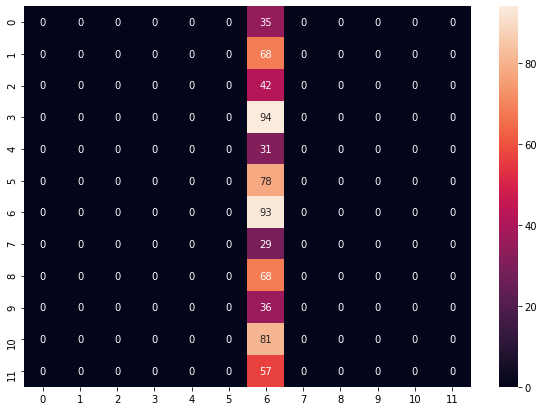

In [41]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
result = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_true, result)

print(conf_mat)
df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 12)],
                  columns = [i for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

# Conclusion

While theresult is quite poor,  the number of epochs was quite low due to computational time requirments. I had 10 epochs while there should be a 100 or so ... This is one parameter that can be adjusted.

Also given time, we do have ample hyper parameters to apply to improve these results.
For example- the FILTER SIZE can be adjusted to 3x3, or 5x5, and so can the STRIDE of the filter 
as well as PADDING size that will include the edges of the pictures and make it more precise...
Potentially we can add more convolution layers and pools although it  seems to me we have  a few already ...


Lastly we could try to run the model given input from an RGB picture to see if the additional colors  add anything to the activation mapping of edges. 

While the above descrive CNN hyper parameters, we also have available ANN hyperparameters. These could be additional HIDDEN LAYERS or more NEURONS since at ANN we set the number of Neurons ...

Of course we can try with different optimizers to ADAM that has been applied here in both CNN and ANN parts and see if the results improve ...


  